In [43]:
## data from https://health.data.ny.gov/Health/Behavioral-Risk-Factor-Surveillance-Survey-2020/p28d-66gt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns



In [60]:
data = pd.read_csv('data.csv') # load file
data.size

4859001

In [9]:
data.dtypes

_STATE          object
IDATE            int64
IMONTH           int64
IDAY             int64
IYEAR            int64
                 ...  
PPS_48          object
PPS_52          object
SEXNOCON_OTH    object
NOVEGFRU_OTH    object
CHILDREN        object
Length: 329, dtype: object

In [73]:
## Plots for age (hist), gender (bar), income (hist), preexisting conditions vs disease (pair plots)
## 

#for i in data['AGE']:
#    print(i)
## based off above code, it looks like all entries are either
## "Age __ - __", "Refused", or "Don’t know/Not sure"
## Crop the first option to be the lower bound age and plot a histogram

#define a new dataframe just for age entries
data_age = pd.DataFrame(columns=['AGE'])

# iterate through each age entry of OG dataset
for i in data['AGE']:
    #if it falls into either of these ranges...add it to the new dataframe
    if i == "Age 65 or older":
        data_age = data_age.append(pd.DataFrame([[65]], columns=['AGE']))
    elif i == "Age 55 - 64":
        data_age = data_age.append(pd.DataFrame([[55]], columns=['AGE']))
    elif i == "Age 45 - 54":
        data_age = data_age.append(pd.DataFrame([[45]], columns=['AGE']))
    elif i == "Age 35 - 44":
        data_age = data_age.append(pd.DataFrame([[35]], columns=['AGE']))
    elif i == "Age 25 - 34":
        data_age = data_age.append(pd.DataFrame([[25]], columns=['AGE']))
    elif i == "Age 18 - 24":
        data_age = data_age.append(pd.DataFrame([[15]], columns=['AGE']))
    else: # for invalid entries
        pass

# print out the new dataframe with just age...
data_age


,AGE
0,65
0,55
0,65
0,65
0,35
...,...
0,25
0,25
0,15
0,45


Text(0.5, 0, 'Age ranges')

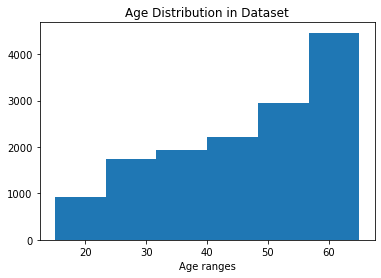

In [112]:
fig, ax = plt.subplots(1,1)
ax.hist(data_age['AGE'], bins=6)
ax.set_title("Age Distribution in Dataset")
ax.set_xlabel("Age ranges")

## there is not a normal distribution of age -- the number of people responding
## trends older

In [113]:
## PAIR PLOT for preexisting contitions and diseases
## first need to clean up the data...
## preexisting conditions to consider:
## ## "DEAF", "BLIND", "FLUSHOT7", "SMOKE100", "BIRTHSEX"
## ## "Yes/No", "Yes/No", "Yes/No" "Yes/No", "Male/Female"

data_cat = pd.read_csv('data_import.csv') # load file
data_cat.size


177228

In [124]:
# get list of columns
cols = []
for i in data_cat:
    cols.append(str(i))

print(", ".join(cols))
# make empty dataframe to put refined data into 
data_cat_fine = pd.DataFrame(index=range(len(data_cat)),columns=range(len(cols)))



MEDCOST, HARTATK, ARTHR, KDYDIS, DIABETE, SMOKE, PNEUVAC, ASTHM, BMI, INCOME, FLUSHOT, REGION


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
14764    NaN
14765    NaN
14766    NaN
14767    NaN
14768    NaN
Name: 0, Length: 14769, dtype: object

In [142]:
# MEDCOST , 0
count = 0
j = 0
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Yes":
        data_cat_fine[j][count] = 1
    elif i == "No":
        data_cat_fine[j][count] = 0
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [143]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14765,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14766,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14767,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# HARTATK , 1
count = 0
j = 1
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Yes":
        data_cat_fine[j][count] = 1
    elif i == "No":
        data_cat_fine[j][count] = 0
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [145]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14765,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14766,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14767,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
# ARTHR , 2
count = 0
j = 2
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Yes":
        data_cat_fine[j][count] = 1
    elif i == "No":
        data_cat_fine[j][count] = 0
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [147]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14765,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14766,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14767,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# KDYDIS , 3
count = 0
j = 3
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Yes":
        data_cat_fine[j][count] = 1
    elif i == "No":
        data_cat_fine[j][count] = 0
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [149]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14765,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14766,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14767,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
# DIABETE , 4
count = 0
j = 4
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Yes":
        data_cat_fine[j][count] = 1
    elif i == "No":
        data_cat_fine[j][count] = 0
    elif i == "No, pre-diabetes or borderline diabetes":
        data_cat_fine[j][count] = 2
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [151]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14765,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14766,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14767,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
# SMOKE , 5
count = 0
j = 5
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Yes":
        data_cat_fine[j][count] = 1
    elif i == "No":
        data_cat_fine[j][count] = 0
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [153]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14765,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14766,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14767,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# PNEUVAC , 6
count = 0
j = 6
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Yes":
        data_cat_fine[j][count] = 1
    elif i == "No":
        data_cat_fine[j][count] = 0
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [155]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
2,0,0,1,0,1,1,1,NaN,NaN,NaN,NaN,NaN
3,0,0,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
14765,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
14766,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
14767,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN


In [156]:
# ASTHM , 7
count = 0
j = 7
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Current":
        data_cat_fine[j][count] = 1
    elif i == "Never":
        data_cat_fine[j][count] = 0
    elif i == "Former":
        data_cat_fine[j][count] = 2
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [157]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,0,0,1,0,1,1,1,0,NaN,NaN,NaN,NaN
3,0,0,1,0,0,0,1,0,NaN,NaN,NaN,NaN
4,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
14765,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
14766,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
14767,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [160]:
# BMI , 8
## "Obese" - 0, "Overweight" - 1, "Normal Weight" - 2, "Underweight" - 3
count = 0
j = 8
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Obese":
        data_cat_fine[j][count] = 1
    elif i == "Overweight":
        data_cat_fine[j][count] = 0
    elif i == "Normal Weight":
        data_cat_fine[j][count] = 2
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [161]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,1,NaN,NaN,NaN
1,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
2,0,0,1,0,1,1,1,0,2,NaN,NaN,NaN
3,0,0,1,0,0,0,1,0,0,NaN,NaN,NaN
4,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN
14765,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN
14766,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN
14767,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [162]:
# INCOME , 9
# "$50,000 or more" - 0, "$35,000 to less than $50,000" - 1, "$25,000 to less than $35,000" - 2, "$15,000 to less than $25,000" - 3, "Less than $15,000" - 4
count = 0
j = 9
for i in data_cat[cols[j]]:
    #print(count)
    if i == "$50,000 or more":
        data_cat_fine[j][count] = 0
    elif i == "$35,000 to less than $50,000":
        data_cat_fine[j][count] = 1
    elif i == "$25,000 to less than $35,000":
        data_cat_fine[j][count] = 2
    elif i == "$15,000 to less than $25,000":
        data_cat_fine[j][count] = 3
    elif i == "Less than $15,000":
        data_cat_fine[j][count] = 4
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [163]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,1,0,NaN,NaN
1,0,0,0,0,0,0,0,0,1,0,NaN,NaN
2,0,0,1,0,1,1,1,0,2,0,NaN,NaN
3,0,0,1,0,0,0,1,0,0,0,NaN,NaN
4,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,0,0,2,0,NaN,NaN
14765,0,0,0,0,0,0,0,0,2,3,NaN,NaN
14766,0,0,0,0,0,0,0,0,2,NaN,NaN,NaN
14767,0,0,0,0,0,0,0,0,0,3,NaN,NaN


In [164]:
# FLUSHOT - 10
# "Yes" - 1, "No" - 0, "Age Less Than 65" - 2
count = 0
j = 10
for i in data_cat[cols[j]]:
    #print(count)
    if i == "Yes":
        data_cat_fine[j][count] = 1
    elif i == "No":
        data_cat_fine[j][count] = 0
    elif i == "Age Less Than 65":
        data_cat_fine[j][count] = 2
    else:
        data_cat_fine[j][count] = np.nan
    count += 1

In [165]:
data_cat_fine

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,1,0,1,NaN
1,0,0,0,0,0,0,0,0,1,0,2,NaN
2,0,0,1,0,1,1,1,0,2,0,1,NaN
3,0,0,1,0,0,0,1,0,0,0,1,NaN
4,0,0,0,0,1,0,0,0,0,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
14764,0,0,0,0,0,0,0,0,2,0,2,NaN
14765,0,0,0,0,0,0,0,0,2,3,2,NaN
14766,0,0,0,0,0,0,0,0,2,NaN,2,NaN
14767,0,0,0,0,0,0,0,0,0,3,2,NaN


<AxesSubplot:>

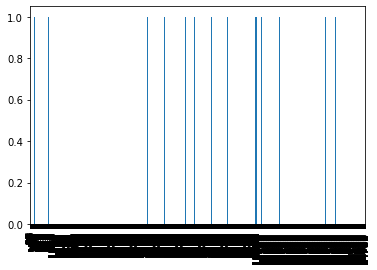

In [170]:
#fig, ax = plt.subplots(2,5)
data_cat_fine[0].plot(kind="bar")